# Crater Simulation
#### ASTR 3750 final project
###### Thor Breece

## Assumptions

* All impactors are perfectly spherical
* Impacts happening on a body with lunar mass (M = 7.35*10^22 Kg) (g = 1.62 m/s^2)
* Planetary body has no atmosphere (to eliminate drag from the equation)
* All impactors have same density
* Assume all impactors hit moon-like planet at perfect 90º angle
* Ignores decreasing probability of impacts with increasing meteor size

In [16]:
# import required libraries
import numpy as np # used for array formation
import matplotlib.pyplot as plt # used for plotting
import random as rand # used for rng generation of impactors
from math import pi # used in various equations
from PIL import Image # used to parse images by pixels
from tqdm import tqdm # used to display progress bar
import time # used to help display progress bar

In [17]:
# declaration of constants
g = 1.62 # lunar gravity
G = 6.67e-11 # Gravitational constant
M_lunar = 7.35e22 # mass of moon sized body
p_moon = 3344 # density of moon-like body

#### The next three cells are example data
##### Also used for debugging

In [18]:
# # generate random impactors
# impactors_radius = np.empty([1000])
# impactors_mass = np.empty([1000])
# impactors_velocities = np.empty([1000])
# impactors_densities = np.empty([1000])
# for i in range(1000):
#     impactors_radius[i] = rand.randint(500, 2000) # this range always produces > 10 km craters
#     impactors_densities[i] = rand.randint(1000, 5200) # density will range somewhere between near pure ice comets and fully rocky asteroids 
#     impactors_velocities[i] = rand.randint(10000, 20000) # this range cominbed with radius always produces > 10 km craters
#     impactors_mass[i] = ((4/3) * pi * (impactors_radius[i]) ** (2)) * (impactors_densities[i]) # mass unused in next few calculations

In [19]:
class impactor:
    def __init__(self):
        self.radius = rand.randint(500, 2000)
        self.density = rand.randint(1000, 5200)
        self.velocity = rand.randint(10000, 20000)
        self.mass = ((4/3) * pi * (self.radius) ** (2)) * (self.density)
    def calculate_crater_diameter(self, planet_gravity=9.81, planet_density=5515):
        vel_over_g = ((self.velocity ** 2) / planet_gravity) ** (1/4)
        impactor_over_planet = (self.density / planet_density) ** (1/4)
        self.crater_diameter = (vel_over_g * impactor_over_planet * ((self.radius * 2) ** (3/4)))


In [20]:
craters = []
for i in range(1000):
    temp = impactor()
    temp.calculate_crater_diameter(g, p_moon)
    craters.append(temp)

In [21]:
# # use generated impactors to determine impact velocity
# crater_diameters = np.empty([1000])

# for j in range(1000):
#     # the next three lines are the equation from Lecture 21 slide 13
#     # D = (((v^2)/g)^1/4) * ((p_impactor/p_planet)^1/4) * ((L)^3/4)
#     vel_over_g = (((impactors_velocities[j])**2) / (g)) ** (1 / 4)
#     impactor_over_planet = (impactors_densities[j] / p_moon) ** (1 / 4)
#     crater_diameters[j] = (vel_over_g * impactor_over_planet * ((impactors_radius[j] * 2) ** (3 / 4)))
    

In [22]:
# Printed out some data for debugging purposes
print("impact # | impactor radius (m) | impactors density (Kg/m^3) | impactor mass (Kg) | impactor velocity (m/s) | crater diameter (m)")
print("------------------------------------------------------------------------------------------------------------------------------")
for i in range(10):
    print(f'{i:8d} | {craters[i].radius:19.0f} | {craters[i].density:26.0f} | {craters[i].mass:18.1e} | {craters[i].crater_diameter:15.1f}')

impact # | impactor radius (m) | impactors density (Kg/m^3) | impactor mass (Kg) | impactor velocity (m/s) | crater diameter (m)
------------------------------------------------------------------------------------------------------------------------------
       0 |                1808 |                       3796 |            5.2e+10 |         52109.0
       1 |                 948 |                       4477 |            1.7e+10 |         37644.7
       2 |                1420 |                       3450 |            2.9e+10 |         48145.8
       3 |                 844 |                       4191 |            1.3e+10 |         32427.9
       4 |                 911 |                       3730 |            1.3e+10 |         28285.8
       5 |                1837 |                       2671 |            3.8e+10 |         50974.6
       6 |                 727 |                       1459 |            3.2e+09 |         20612.8
       7 |                1867 |                   

#### Using slightly adjusted algorithm, we plot craters.

573.4000000000015it [02:55,  3.27it/s]                              


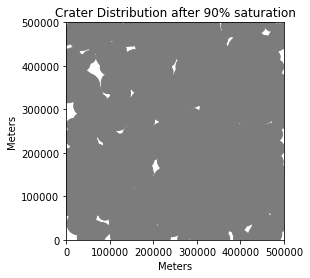

In [7]:
t1 = 0 # used to display time scale on which crater saturation occurs
i = 0 # used to calculate average crater diamete
total_m = 0
saturation_list = [] # holds all saturation values
saturation = 0 # declaration of saturation variable
crat_tot1 = 0
with tqdm(total = 544) as pbar: # progress bar
    while(saturation < 0.9): # while < 90% saturation
        temp = impactor()
        temp.calculate_crater_diameter(g, p_moon)
        x = rand.randint(1, 500000) # random x cord
        y = rand.randint(1, 500000) # random y cord
         # Very easy way to erase earlier craters by giving fill color to craters

        fig = plt.gcf()
        ax = fig.gca()
        ax.add_patch(plt.Circle((x, y), (temp.crater_diameter / 2), edgecolor='#7d7c7c', facecolor='#7d7c7c')) # add circle to graph

        plt.xlim(0, 500000) # x limit
        plt.ylim(0, 500000) # y limit
        plt.xlabel("Meters")
        plt.ylabel("Meters")
        if (saturation >= .24 and saturation <= .26):
            plt.title('Crater Distribution after 25% saturation')
            ax.set_aspect('equal') # make sure cirlces appear with no eccentricity
            fig.savefig('25%.png') # save img
        elif(saturation >= .49 and saturation <= .51):
            plt.title('Crater Distribution after 50% saturation')
            ax.set_aspect('equal') # ''
            fig.savefig('50%.png') # ''
        elif(saturation >= .74 and saturation <= .76):
            plt.title('Crater Distribution after 75% saturation')
            ax.set_aspect('equal') # ''
            fig.savefig('75%.png') # ''
        elif(saturation >= .89 and saturation <= .91):
            plt.title('Crater Distribution after 90% saturation')
            ax.set_aspect('equal') # ''
            fig.savefig('100%.png') # ''
        ax.set_aspect('equal')
        # uses pixels to calculate percentage of figure that is covered by craters
        fig.savefig(f'temp.png') # save temp img
        im = Image.open(f'temp.png') # open temp img
        pixel_colors = im.getdata() # save rgb data from temp img
        crater_pix = 0;
        for x in range(len(pixel_colors)):
            temp = pixel_colors[x][0] * pixel_colors[x][1] * pixel_colors[x][2]
            if (temp == 1922000): # value of r * g * b for hex color #7d7c7c
                crater_pix += 1
        saturation = round(crater_pix / 50000 , 3)
        saturation_list.append(saturation)
        t1 += 1000 # time step
        i += 1
        time.sleep(0.001)
        crat_total_area += temp.crater_diameter
        pbar.update(saturation)
total_m = i
avg_crat_m = crat_total_area / i

##### NOTE: The axes and title are not visible on follwoign plots if using "dark mode" in IDE

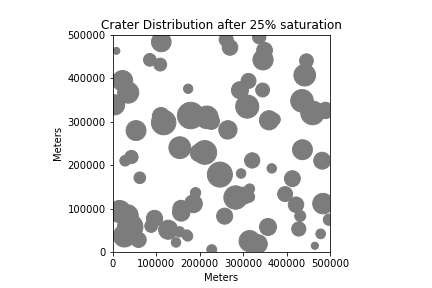

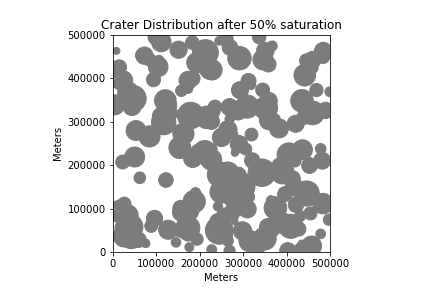

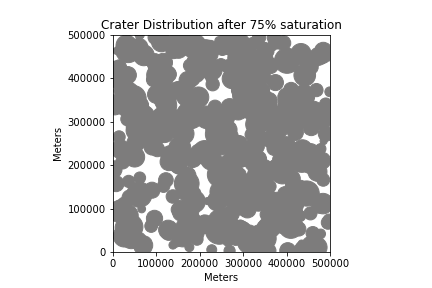

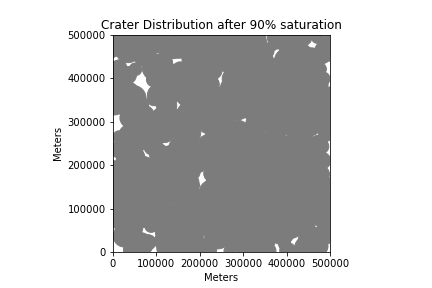

In [8]:
img1 = Image.open('25%.png')
img2 = Image.open('50%.png')
img3 = Image.open('75%.png')
img4 = Image.open('100%.png')
img1.show()
img2.show()
img3.show()
img4.show()

The runtime to saturate the plot increases exponentially as you approach 100% so decided that saturation is at 90%. 
It takes around 800,000 years to saturate but, but fluctuates a bit due to random number generation. 
Starting from 25%, the saturation of craters logarithmically tapers off. This is because as more of the plot is saturated, there is a higher likelyhood that an impact occurs where there is already a crater. This makes sense as the saturation values should not increase in craters happen where craters already exist.

Time to Saturation: 856000 years 



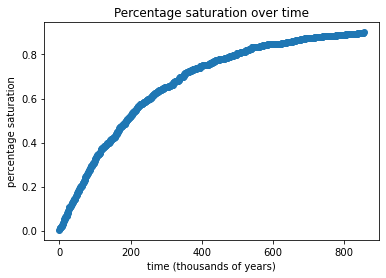

In [9]:
saturation_arr = np.array(saturation_list) # convert to a float array in order to perforce calculations
plt.scatter(range(int(t1 / 1000)), saturation_arr) # plot saturation over time
plt.xlabel("time (thousands of years)")
plt.ylabel("percentage saturation")
plt.title("Percentage saturation over time")
print(f'Time to Saturation: {t1} years \n') # print time to saturation

Percentage saturation follows a logorithmic curve and as time goes to infinity, it reaches 100%. (Haven't checked how long it actually takes to reach 100% as it takes too long to run)

## Changed Assumption

Instead of using the moon, let's see what changes if we use the Earth!
### Assumptions
* Assume all impactors come into atmosphere at perfect 90º angle to 500 x 500 Km flat plane
* No tectonic activity happens, so crartering is not erased by tectonic activity.
* Lifeless - no erasing of craters due to biological reasons (trees covering up craters)
* Assume all meteors are spherical
* At the scale of impactors required to produce 10km craters, drag is irrelevent

At first I attempted all these calculations accounting for drag, but couldn't get an accurate number. Research led me to discover that impacotrs of the size needed to create > 10 km craters on Earth, are moving at such high velocities, drag becomes negligable. 

#### More Example data

In [24]:
# declaration of variables
g_earth = 9.81 # Earth's gravity
G = 6.67e-11 # gravitational constant
M_Earth = 5.972e24 # mass of the earth
p_earth = 5515 # density of the earth
# C = 0.47 used on earlier attempts before realization of irrelevence of drag
# p_atmosphere = 1.23 used on earlier attempts before realization of irrelevence of drag
# d_atmos_to_surface = 99779 used on earlier attempts before realization of irrelevence of drag

In [25]:
craters_E = []
for i in range(1000):
    temp = impactor()
    temp.calculate_crater_diameter(g_earth, p_earth)
    craters_E.append(temp)

In [29]:
print("impact # | impactor radius (m) | impactors density (Kg/m^3) | impactor mass (Kg) | impactor velocity (m/s) | crater diameter (m)")
print("------------------------------------------------------------------------------------------------------------------------------")
for i in range(10):
    print(f'{i:8d} | {craters_E[i].radius:19.0f} | {craters_E[i].density:26.0f} | {craters_E[i].mass:18.1e} | {craters_E[i].velocity:23.0f} | {craters_E[i].crater_diameter:.1f}')

impact # | impactor radius (m) | impactors density (Kg/m^3) | impactor mass (Kg) | impactor velocity (m/s) | crater diameter (m)
------------------------------------------------------------------------------------------------------------------------------
       0 |                1806 |                       1742 |            2.4e+10 |                   17529 | 26130.5
       1 |                1974 |                       4400 |            7.2e+10 |                   16856 | 34531.8
       2 |                1356 |                       5045 |            3.9e+10 |                   11253 | 22029.9
       3 |                 594 |                       2237 |            3.3e+09 |                   17581 | 12098.9
       4 |                 756 |                       4704 |            1.1e+10 |                   13873 | 15508.2
       5 |                1396 |                       1624 |            1.3e+10 |                   13303 | 18439.7
       6 |                 815 |          

325.26it [01:19,  4.11it/s]                                      


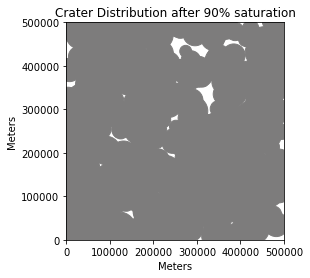

In [14]:
t = 0
i = 0
total_e = 0;
saturation_list = []
saturation = 0
crat_tot2 = 0
with tqdm(total = 280) as pbar: # progress bar
    while(saturation < 0.9): # while < 90% saturation
        temp = impactor()
        temp.calculate_crater_diameter() # default values are Earth values.
        x = rand.randint(1, 500000) # random x cord
        y = rand.randint(1, 500000) # random y cord
        fig = plt.gcf() # matplot built in function -> "get current figure"
        ax = fig.gca() # matplot built in function -> "get current axes"
        ax.add_patch(plt.Circle((x, y), (temp.crater_diameter / 2), edgecolor='#7d7c7c', facecolor='#7d7c7c')) # add circle to graph

        plt.xlim(0, 500000) # x limit
        plt.ylim(0, 500000) # y limit
        plt.xlabel("Meters")
        plt.ylabel("Meters")
        # This if elif elif elif statement uses a range just above and just below 25%, 50%, 75% and 90% respectively as saturation values are rarely exactly those values
        if (saturation >= .24 and saturation <= .26):
            plt.title('Crater Distribution after 25% saturation')
            ax.set_aspect('equal') # make sure cirlces appear with no eccentricity
            fig.savefig('25%_Earth.png') # save img
        elif(saturation >= .49 and saturation <= .51):
            plt.title('Crater Distribution after 50% saturation')
            ax.set_aspect('equal') # ''
            fig.savefig('50%_Earth.png') # ''
        elif(saturation >= .74 and saturation <= .76):
            plt.title('Crater Distribution after 75% saturation')
            ax.set_aspect('equal') # ''
            fig.savefig('75%_Earth.png') # ''
        elif(saturation >= .89 and saturation <= .91):
            plt.title('Crater Distribution after 90% saturation')
            ax.set_aspect('equal') # ''
            fig.savefig('100%_Earth.png') # ''
        ax.set_aspect('equal')
        # originally used a calculation at the beiginning to determine total # of pixels beofre first impact, but gets too exact of a number and increases calculation time significantly
        # uses pixels to calculate percentage of figure that is covered by craters
        # This method of calculating the saturation accounts for craters erasing other craters as it does not increase saturation if a smaller impact happens on top of a earlier one
        fig.savefig(f'temp.png') # temp image for saturation equation via pixels
        im = Image.open(f'temp.png') # open image
        pixel_colors = im.getdata() # store pixel rgb data in an array
        crater_pix = 0;
        for x in range(len(pixel_colors)): # for x in total number of pixels ...
            temp = pixel_colors[x][0] * pixel_colors[x][1] * pixel_colors[x][2] # multiply each pixel value together (excluding opacity values)
            if (temp == 1922000): # value of (r * g * b) for hex color #7d7c7c
                crater_pix += 1
        saturation = round(crater_pix / 50000 , 3) # divide crater pixels by 50000 (roughly correct number of pixels)
        saturation_list.append(saturation) # add saturation value to saturation list
        t += 1000 # time step as specified by instructions
        i += 1 # keeps track of total number of craters
        crat_tot2 += temp.crater_diameter
        time.sleep(0.001) # progress bar
        pbar.update(saturation) # progress bar
total_e = i
crat_avg_e = crat_tot2 / i # calculate average crater size for earth


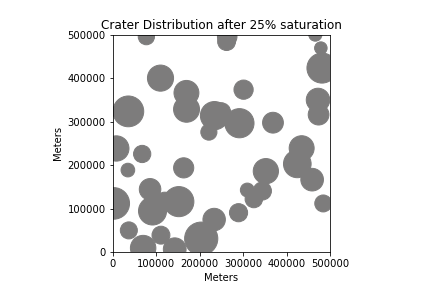

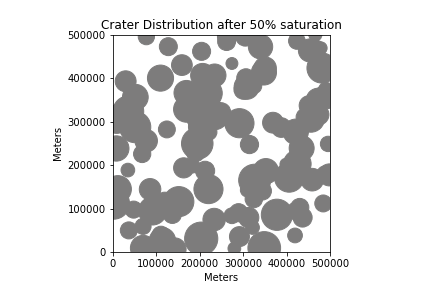

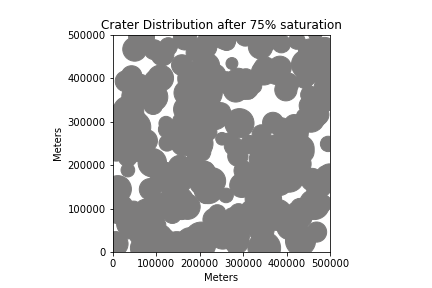

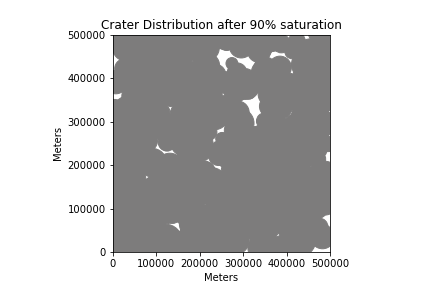

In [15]:
img5 = Image.open('25%_Earth.png') # open saved image
img6 = Image.open('50%_Earth.png') # ''
img7 = Image.open('75%_Earth.png') # ''
img8 = Image.open('100%_Earth.png') # ''
img5.show() # display saved image
img6.show() # ''
img7.show() # ''
img8.show() # ''

 The first thing I noticed was that craters on earth are on average larger than those on the moon. My hypothesis is that due to the Earth's higher gravity, and higher impact velocities, craters on Earth are usually larger for the same sized object (given that object is above a certain minimum size where drag becomes negligable).

Time to Saturation: 489000 years 



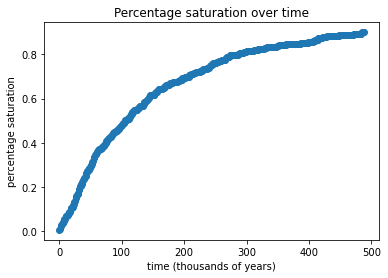

In [16]:
saturation_arr1 = np.array(saturation_list) # convert to float values to allow calculations
plt.scatter(range(int(t / 1000)), saturation_arr1) # plot values over time
plt.xlabel("time (thousands of years)") 
plt.ylabel("percentage saturation")
plt.title("Percentage saturation over time")
print(f'Time to Saturation: {t} years \n') # print saturation time

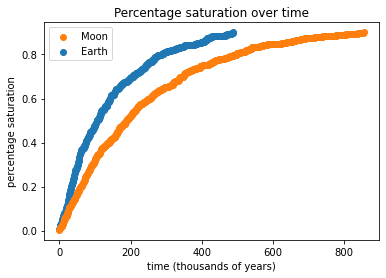

In [17]:
earth = plt.scatter(range(int(t / 1000)), saturation_arr1)
moon = plt.scatter(range(int(t1 / 1000)), saturation_arr)
plt.xlabel("time (thousands of years)")
plt.ylabel("percentage saturation")
plt.title("Percentage saturation over time")
plt.legend([moon, earth], ['Moon', 'Earth'])

Comparing the two graphs, I found it interesting that the moon takes about twice as long to saturate as the earth. Mathamatical proof given below.

In [30]:
print(f'At an average crater size of {avg_crat_m:.2f} it takes {total_m} craters to reach saturation on a moon-like body (crater simulation)')
print(f'At an average crater size of {crat_avg_e:.2f} it takes {total_e} craters to reach saturation on a earth-like body (crater simulation)')
print(f'Ratio of time scales (moon/earth) = ({t1} / {t}) = {t1/t:.2f}')

At an average crater size of 36586.56 it takes 856 craters to reach saturation on a moon-like body (crater simulation)
At an average crater size of 49491.20 it takes 489 craters to reach saturation on a earth-like body (crater simulation)
Ratio of time scales (earth/moon) = (489000 / 856000) = 1.75


### Conclusion

One assumption I hadn't forseen was that at the scale of impactors required to produce 10 km or larger craters, drag becomes irrelevent. I found this out after some research. (Source: [amsmeteors.org](https://www.amsmeteors.org/fireballs/faqf/?#:~:text=The%20meteorite%20then%20quickly%20reaches,deceleration%20due%20to%20atmospheric%20drag.))  Still, each impactor results in an, on average, larger crater - As shown by the result below. The average crater size being larger points to my hypothesis being true. 

Obviously, there are a few assumptions made that make this a lot more simplistic than it is in reality, but gives an idea of what it would take to produce craters < 10km in diameter on earth. I first attempted to do this where each meteor decelerated all the way to terminal velocity. Once I realized this didn't account for initial velocities, I attempted to do the calculation by using decceleration due to drag but ran into a lot of issues. For one, I kept getting that impactors decelerated by greater than the speed of light in less than a second! After a lot of research I eventually realized that drag becoems irrelevent at these scales. While the craters don't show any statistical significance themselves, I found that the timescales did showing roughly a 7:4 ratio between the moon and the earth. If I had more time (and more RAM) I would run this simulation a multitude of times to figure out average time scales. My hypothesis is that it would average out to around a 2:1 ratio.